In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Logistic Regression

In [64]:
data = np.loadtxt('ex2data1.txt', delimiter=',', usecols=(0, 1, 2))
data.shape

(100, 3)

In [65]:
def find(data, o):
    return data[data[:, -1] == o]

pos = find(data, 1)
neg = find(data, 0)

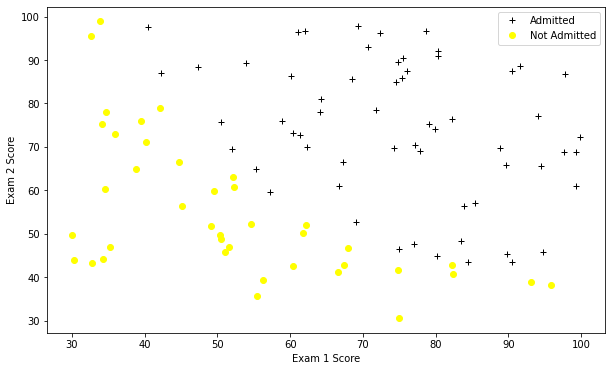

In [66]:
def plotData(data):
    '''
    Data is a data matrix with last column as y
    '''
    y = data[:, -1]
    pos = find(data, 1)
    neg = find(data, 0)
    plt.figure(figsize=(10, 6))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label = 'Admitted')
    plt.plot(neg[:, 0], neg[:, 1], 'ko',color = 'yellow', label = 'Not Admitted')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()

plotData(data)

In [67]:
# define X and y
X = np.column_stack((np.ones(data.shape[0]), data[:, :-1]))
y = data[:, -1].reshape((100, 1))

initial_theta = np.zeros(X.shape[1]).reshape((X.shape[1], 1))
iterations = 200
alpha = 0.001

In [68]:
# from scipy.special import expit as sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

print(sigmoid(0))

0.5


In [69]:
def costFunction(x, y, theta, lamb = 0):
    m=x.shape[0]
    z = np.dot(x, theta)
    f = sigmoid(z)
    term1 = np.dot(y.T, np.log(f))
    term2 = np.dot((1 - y).T, np.log(1 - f))
    t1 = theta[1:]
    reg_term = lamb/2*np.dot(t1.T, t1)
    return float(-(term1+term2)/m)

print(costFunction(X, y,initial_theta))

0.6931471805599452


In [70]:
def computeGradient(X,y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

In [71]:
def GradientDescent(x, y, initial_theta, iterations, alpha = 0.01, lamb = 0):
    m = x.shape[0]
    loss_history = []
    theta_history = []
    theta = initial_theta
    for i in range(iterations):
        loss = costFunction(x, y, theta)
        loss_history.append(loss)
        theta_history.append(theta)
        z = np.dot(x, theta)
        y_hat = sigmoid(z)
        theta = theta - alpha/m*(np.dot(x.T, (y_hat-y)) + lamb*theta)
    
    return loss_history, theta_history

loss_hist, theta_hist = GradientDescent(X, y, initial_theta, iterations=200000, alpha=0.001)
final_loss = loss_hist[-1]
final_theta = theta_hist[-1]
print(final_loss)
print(final_theta)

0.31655478389359226
[[-7.45015704]
 [ 0.06550379]
 [ 0.05898685]]


In [72]:
test_x = np.array([1, 45, 85])
y_test = sigmoid(np.dot(test_x, final_theta))
y_test

array([0.62513349])

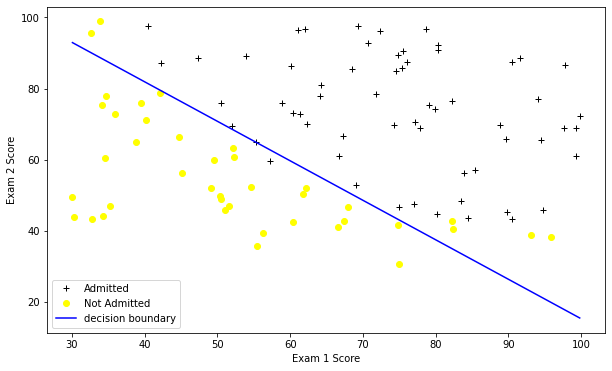

In [73]:
plotData(data)
b_x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
b_x2 = (-final_theta[0]-final_theta[1]*b_x1)/final_theta[2]
plt.plot(b_x1, b_x2, 'b-', label='decision boundary')
plt.legend()

In [74]:
b_x1

array([30.05882245, 99.8278578 ])

2. Regurlarized logistic regression

In [75]:
d2 = np.loadtxt('ex2data2.txt', usecols=(0,1,2), delimiter=',')

In [76]:
d2.shape

(118, 3)

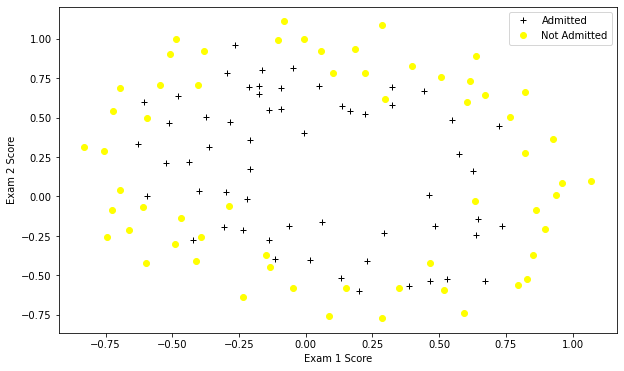

In [77]:
plotData(d2)

In [112]:
def mapFeature(data):
    '''
    
    '''
    m,n =data.shape
    ones = np.ones(m)
    x1 = data[:, 0]
    x2 = data[:, 1]
    X = np.column_stack((ones, data[:,:2]))
    L = []
    max_poly = 6
    i = 2
    while i <= 6:
        for p in range(i+1):
            term = (x1**(i-p))*(x2**(p))
            X = np.column_stack((X, term))
        i += 1
    return X



In [116]:
X = mapFeature(d2)
y = d2[:, -1]

initial_theta = np.zeros(X.shape[1])

In [117]:
print(costFunction(X, y, initial_theta))

0.6931471805599454


In [93]:
def GradientDescentReg(x, y, initial_theta, iterations, alpha = 0.01, lamb = 0):
    m = x.shape[0]
    loss_history = []
    theta_history = []
    theta = initial_theta
    for i in range(iterations):
        loss = costFunction(x, y, theta)
        loss_history.append(loss)
        theta_history.append(theta)
        z = np.dot(x, theta)
        y_hat = sigmoid(z)
        gradient = np.dot(x.T, (y_hat-y))
        # Do Not include theta1 into Gradient
        gradient[1:] += lamb*theta[1:]
        theta = theta - alpha/m*gradient
    
    return loss_history, theta_history


In [99]:
L0, T0 = GradientDescentReg(X, y, initial_theta, iterations=200000, alpha=0.001, lamb= 0)
L1, T1 = GradientDescentReg(X, y, initial_theta, iterations=200000, alpha=0.001, lamb= 1)
L100, T100 = GradientDescentReg(X, y, initial_theta, iterations=200000, alpha=0.001, lamb= 100)

In [100]:
print(L0[-1])
print(L1[-1])
print(L100[-1])

0.39968891474888557
0.46912351042891925
0.6803808087867577


In [128]:
final_theta = T1[-1].reshape((1, 28))
print(final_theta.shape)

(1, 28)


Text(0.5, 1.0, 'Decision Boundary')

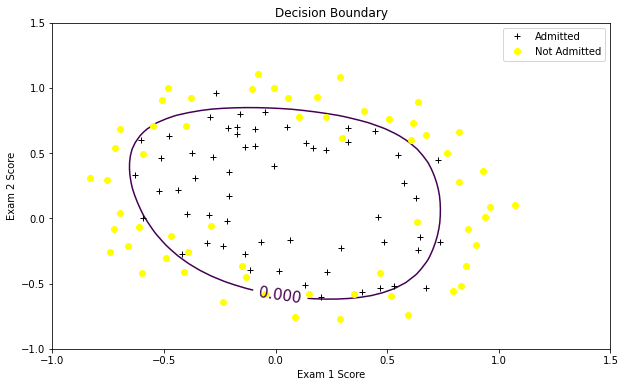

In [129]:
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))
for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.column_stack((np.array([xvals[i]]),np.array([yvals[j]]))))
            zvals[i][j] = np.dot(final_theta,myfeaturesij.T)
zvals = zvals.transpose()

u, v = np.meshgrid( xvals, yvals )
plotData(d2)
mycontour = plt.contour( xvals, yvals, zvals, [0])
plt.clabel(mycontour, inline=1, fontsize=15)
plt.title("Decision Boundary")

Text(0.5, 1.0, 'Decision Boundary')

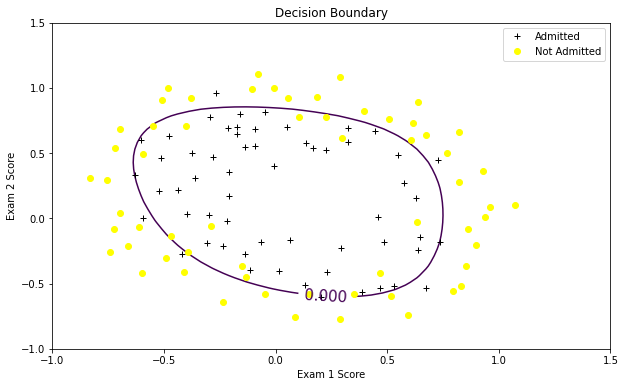

In [130]:
final_theta = T0[-1].reshape((1, 28))
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))
for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.column_stack((np.array([xvals[i]]),np.array([yvals[j]]))))
            zvals[i][j] = np.dot(final_theta,myfeaturesij.T)
zvals = zvals.transpose()

u, v = np.meshgrid( xvals, yvals )
plotData(d2)
mycontour = plt.contour( xvals, yvals, zvals, [0])
plt.clabel(mycontour, inline=1, fontsize=15)
plt.title("Decision Boundary")

Text(0.5, 1.0, 'Decision Boundary')

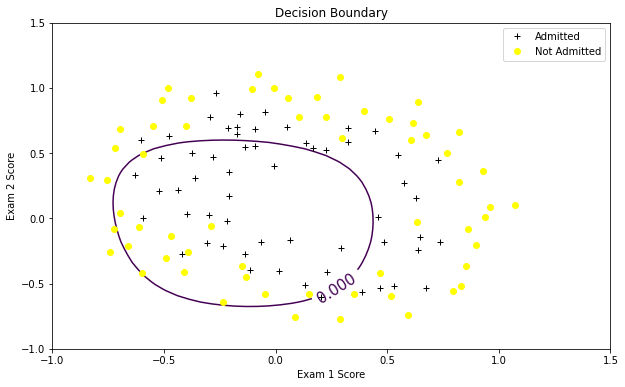

In [131]:
final_theta = T100[-1].reshape((1, 28))
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))
for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.column_stack((np.array([xvals[i]]),np.array([yvals[j]]))))
            zvals[i][j] = np.dot(final_theta,myfeaturesij.T)
zvals = zvals.transpose()

u, v = np.meshgrid( xvals, yvals )
plotData(d2)
mycontour = plt.contour( xvals, yvals, zvals, [0])
plt.clabel(mycontour, inline=1, fontsize=15)
plt.title("Decision Boundary")